In [3]:
#import libraries
import os
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt
import pyBigWig as pbg
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import matplotlib as mpl
import keras.backend as K

In [7]:
def mae(y_true,y_pred):
    return np.asarray(K.mean(K.abs(y_true - y_pred))).round(3)

def mse(y_true,y_pred):
    return np.asarray(np.mean((y_true - y_pred)**2)).round(3)

In [2]:
#load all chrs
X_2L=np.load('/home/florian/projet/r6.16/seq.npz')['2L']
X_2R=np.load('/home/florian/projet/r6.16/seq.npz')['2R']
X_3L=np.load('/home/florian/projet/r6.16/seq.npz')['3L']
X_3R=np.load('/home/florian/projet/r6.16/seq.npz')['3R']
X_4=np.load('/home/florian/projet/r6.16/seq.npz')['4']
X_X=np.load('/home/florian/projet/r6.16/seq.npz')['X']
X_Y=np.load('/home/florian/projet/r6.16/seq.npz')['Y']

In [4]:
#load all chrs
X_2L=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['2L']
X_2R=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['2R']
X_3L=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['3L']
X_3R=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['3R']
X_4=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['4']
X_X=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['X']
X_Y=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['Y']

In [5]:
# create scATAC values for each chr
cut=100
Y_2L=np.load('/home/florian/projet/scATACseq_14chr.npz')['2L'][0]
Y_2L[Y_2L >= cut] = cut
Y_2L=Y_2L/cut

Y_2R=np.load('/home/florian/projet/scATACseq_14chr.npz')['2R'][0]
Y_2R[Y_2R >= cut] = cut
Y_2R=Y_2R/cut

Y_3L=np.load('/home/florian/projet/scATACseq_14chr.npz')['3L'][0]
Y_3L[Y_3L >= cut] = cut
Y_3L=Y_3L/cut

Y_3R=np.load('/home/florian/projet/scATACseq_14chr.npz')['3R'][0]
Y_3R[Y_3R >= cut] = cut
Y_3R=Y_3R/cut

Y_4=np.load('/home/florian/projet/scATACseq_14chr.npz')['4'][0]
Y_4[Y_4 >= cut] = cut
Y_4=Y_4/cut

Y_X=np.load('/home/florian/projet/scATACseq_14chr.npz')['X'][0]
Y_X[Y_X >= cut] = cut
Y_X=Y_X/cut

Y_Y=np.load('/home/florian/projet/scATACseq_14chr.npz')['Y'][0]
Y_Y[Y_Y >= 40] = 40
Y_Y=Y_Y/40

In [11]:
df = pd.read_csv ('/home/florian/projet/models/mse_only3/history.csv')
pred2L=np.load('/home/florian/projet/models/preds_mse_only3.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_mse_only3.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_mse_only3.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_mse_only3.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_mse_only3.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_mse_only3.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_mse_only3.npz')['predY']
corr2L=round(np.corrcoef(Y_2L[::10],pred2L)[0][1],3)
corr2R=round(np.corrcoef(Y_2R[::10],pred2R)[0][1],3)
corr3R=round(np.corrcoef(Y_3R[1::10],pred3R)[0][1],3)#1
corr3L=round(np.corrcoef(Y_3L[::10],pred3L)[0][1],3)
corr4=round(np.corrcoef(Y_4[1::10],pred4)[0][1],3)#1
corrX=round(np.corrcoef(Y_X[1::10],predX)[0][1],3)#1
corrY=round(np.corrcoef(Y_Y[::10],predY)[0][1],3)
mse2L=mse(Y_2L[::10],pred2L)
mse2R=mse(Y_2R[::10],pred2R)
mse3L=mse(Y_3L[::10],pred3L)
mse3R=mse(Y_3R[1::10],pred3R)
mse4=mse(Y_4[1::10],pred4)
mseX=mse(Y_X[1::10],predX)
mseY=mse(Y_Y[::10],predY)
# corr2L=np.corrcoef(Y_2L[::5],pred2L)[0][1]
# corr2R=np.corrcoef(Y_2R[1::5],pred2R)[0][1]
# corr3R=np.corrcoef(Y_3R[1::5],pred3R)[0][1]#1
# corr3L=np.corrcoef(Y_3L[::5],pred3L)[0][1]
# corr4=np.corrcoef(Y_4[1::5],pred4)[0][1]#1
# corrX=np.corrcoef(Y_X[1::5],predX)[0][1]#1
# corrY=np.corrcoef(Y_Y[::5],predY)[0][1]
# corr2L=np.corrcoef(Y_2L,pred2L.ravel())[0][1]
# corr2R=np.corrcoef(Y_2R,pred2R.ravel())[0][1]
# corr3R=np.corrcoef(Y_3R,pred3R.ravel())[0][1]
# corr3L=np.corrcoef(Y_3L,pred3L.ravel())[0][1]
# corr4=np.corrcoef(Y_4,pred4.ravel())[0][1]
# corrX=np.corrcoef(Y_X,predX.ravel())[0][1]
# corrY=np.corrcoef(Y_Y,predY.ravel())[0][1]

In [86]:
rpred2L=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred2L']
rpred2R=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred2R']
rpred3L=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred3L']
rpred3R=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred3R']
rpred4=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred4']
rpredX=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['predX']
rpredY=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['predY']
Ccorr2L=np.corrcoef(rpred2L[::-1],pred2L)[0][1]
Ccorr2R=np.corrcoef(rpred2R[::-1],pred2R)[0][1]
Ccorr3R=np.corrcoef(rpred3R[::-1],pred3R)[0][1]#1
Ccorr3L=np.corrcoef(rpred3L[::-1],pred3L)[0][1]
Ccorr4=np.corrcoef(rpred4[::-1],pred4)[0][1]#1
CcorrX=np.corrcoef(rpredX[::-1],predX)[0][1]#1
CcorrY=np.corrcoef(rpredY[::-1],predY)[0][1]
corr2L=np.corrcoef(Y_2L[::-10],rpred2L)[0][1]
corr2R=np.corrcoef(Y_2R[::-10],rpred2R)[0][1]
corr3R=np.corrcoef(Y_3R[-2::-10],rpred3R)[0][1]#1
corr3L=np.corrcoef(Y_3L[::-10],rpred3L)[0][1]
corr4=np.corrcoef(Y_4[-2::-10],rpred4)[0][1]#1
corrX=np.corrcoef(Y_X[-2::-10],rpredX)[0][1]#1
corrY=np.corrcoef(Y_Y[::-10],rpredY)[0][1]


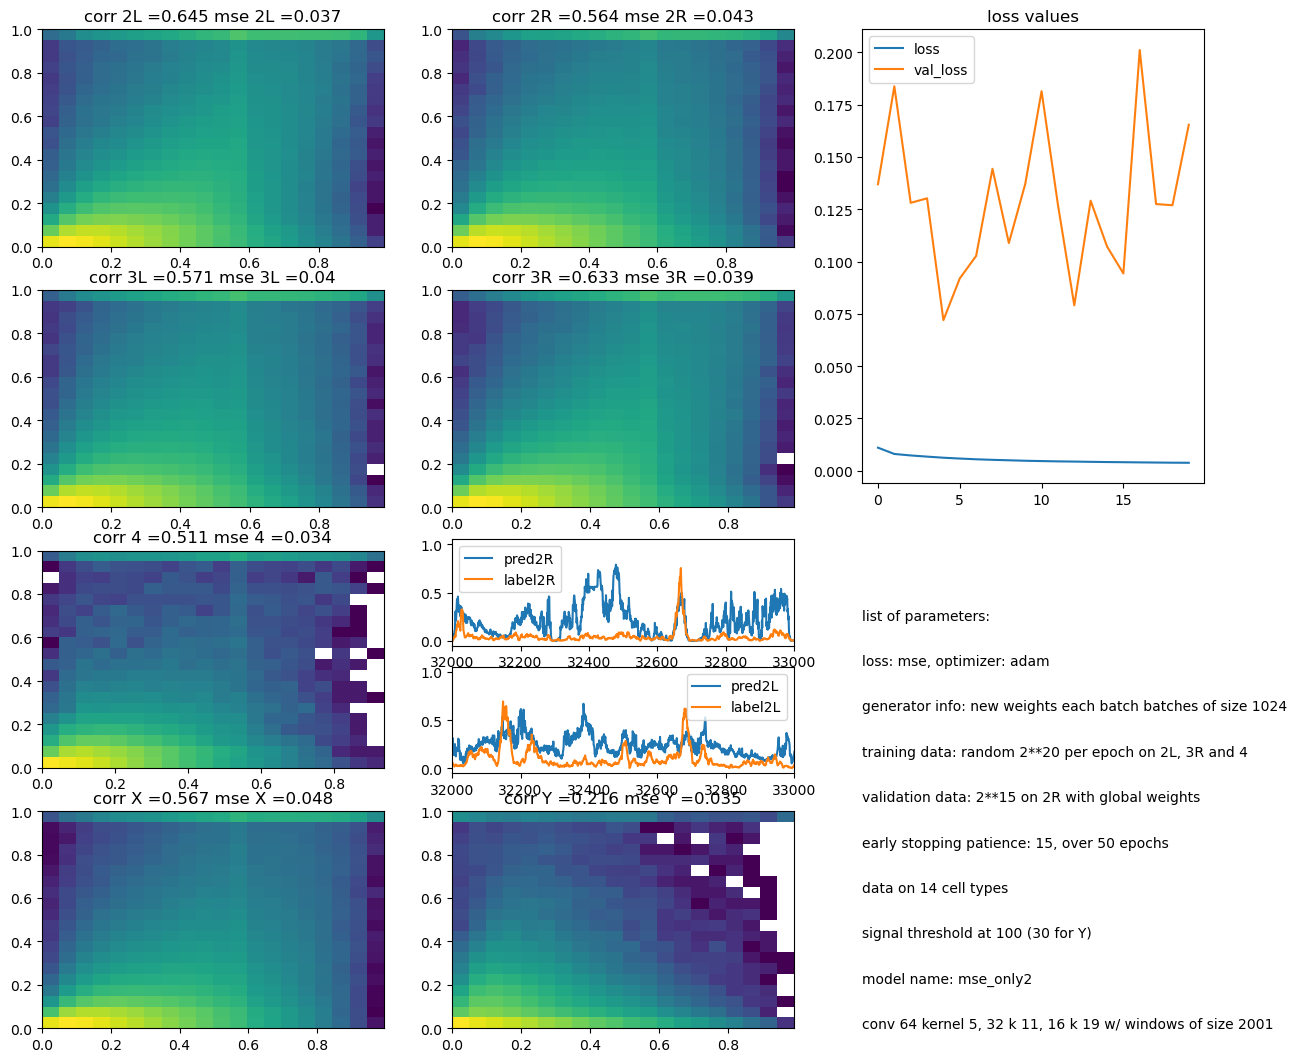

In [12]:
#plots

plt.figure(figsize=(15,10))

plt.subplot(4,3,1)
plt.hist2d(pred2L,Y_2L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2L ='+str(corr2L)+' mse 2L ='+str(mse2L))

plt.subplot(4,3,2)
plt.hist2d(pred2R,Y_2R[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2R ='+str(corr2R)+' mse 2R ='+str(mse2R))

plt.subplot(4,3,4)
plt.hist2d(pred3L,Y_3L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3L ='+str(corr3L)+' mse 3L ='+str(mse3L))

plt.subplot(4,3,5)
plt.hist2d(pred3R,Y_3R[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3R ='+str(corr3R)+' mse 3R ='+str(mse3R))

plt.subplot(4,3,7)
plt.hist2d(pred4,Y_4[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 4 ='+str(corr4)+' mse 4 ='+str(mse4))

plt.subplot(4,3,10)
plt.hist2d(predX,Y_X[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr X ='+str(corrX)+' mse X ='+str(mseX))

plt.subplot(4,3,11)
plt.hist2d(predY,Y_Y[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr Y ='+str(corrY)+' mse Y ='+str(mseY))

plt.subplot(2,3,3)
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

plt.subplot(8,3,14)
plt.plot(pred2R,label='pred2R')
plt.plot(Y_2R[::10],label='label2R')
plt.xlim(32000,33000)
plt.legend()

plt.subplot(8,3,17)
plt.plot(pred2L,label='pred2L')
plt.plot(Y_2L[::10],label='label2L')
plt.xlim(32000,33000)
plt.legend()

plt.subplot(2,3,6)
plt.axis([0, 10, 0, 10])
plt.text(0,9,"list of parameters:")
plt.text(0,8,"loss: mse, optimizer: adam")
plt.text(0,7,"generator info: new weights each batch batches of size 1024")
plt.text(0,6,"training data: random 2**20 per epoch on 2L, 3R and 4")
plt.text(0,5,"validation data: 2**15 on 2R with global weights")
plt.text(0,4,"early stopping patience: 15, over 50 epochs")
plt.text(0,3,"data on 14 cell types")
plt.text(0,2,"signal threshold at 100 (30 for Y)")
plt.text(0,1,"model name: mse_only2")
plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19 w/ windows of size 2001")

plt.axis("off")

plt.subplots_adjust(bottom=0.001, top=0.9999)


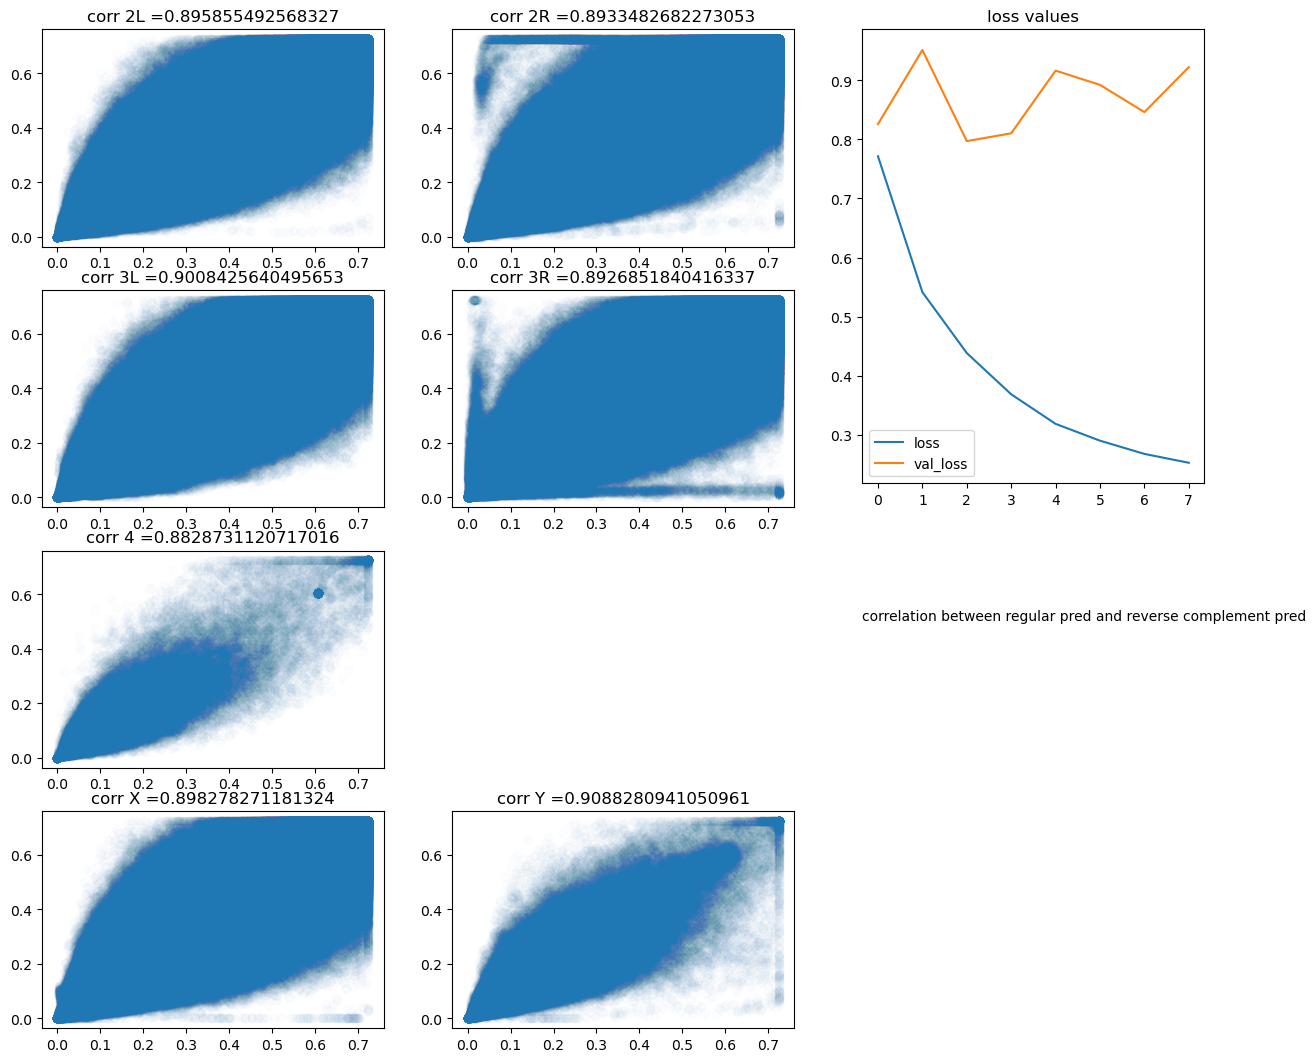

In [120]:
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
plt.scatter(pred2L,rpred2L[::-1],alpha=0.01)
plt.title('corr 2L ='+str(Ccorr2L))

plt.subplot(4,3,2)
plt.scatter(pred2R,rpred2R[::-1],alpha=0.01)
plt.title('corr 2R ='+str(Ccorr2R))

plt.subplot(4,3,4)
plt.scatter(pred3L,rpred3L[::-1],alpha=0.01)
plt.title('corr 3L ='+str(Ccorr3L))

plt.subplot(4,3,5)
plt.scatter(pred3R,rpred3R[::-1],alpha=0.01)
plt.title('corr 3R ='+str(Ccorr3R))

plt.subplot(4,3,7)
plt.scatter(pred4,rpred4[::-1],alpha=0.01)
plt.title('corr 4 ='+str(Ccorr4))

plt.subplot(4,3,10)
plt.scatter(predX,rpredX[::-1],alpha=0.01)
plt.title('corr X ='+str(CcorrX))

plt.subplot(4,3,11)
plt.scatter(predY,rpredY[::-1],alpha=0.01)
plt.title('corr Y ='+str(CcorrY))

plt.subplot(2,3,3)
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

plt.subplot(2,3,6)
plt.axis([0, 10, 0, 10])
plt.text(0,9,"correlation between regular pred and reverse complement pred")
# plt.text(0,8,"loss: mse+cor, optimizer: adam")
# plt.text(0,7,"generator info: global normalized weights with batches of size 4096")
# plt.text(0,6,"training data: random 2**20 per epoch on 2R and 3L")
# plt.text(0,5,"validation data: 2**14 on 3R")
# plt.text(0,4,"early stopping patience: 5, over 20 epochs")
# plt.text(0,3,"data on 14 cell types")
# plt.text(0,2,"signal cut at 100")
# plt.text(0,1,"model name: reverse_complement")
# plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19")

plt.axis("off")

plt.subplots_adjust(bottom=0.001, top=0.9999)

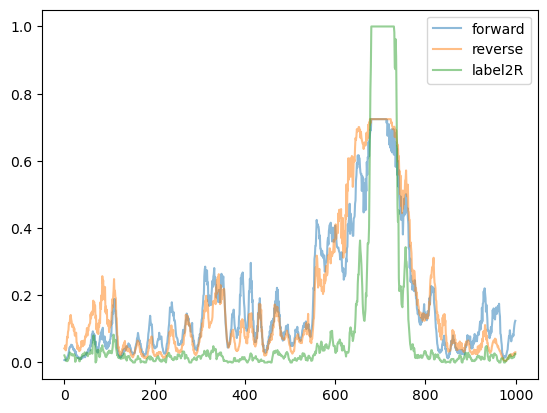

In [30]:
plt.plot(pred2R[572_000:573_000],alpha=0.5,label="forward")
plt.plot(rpred2R[len(rpred2R)-572_000:len(rpred2R)-573_000:-1],alpha=0.5,label="reverse")
plt.plot(Y_2R[5_720_000:5_730_000:10],alpha=0.5,label='label2R')
plt.legend()

In [280]:
corrs=[]
for i in range (1,len(pred2R)-30000,30000):

    corrs.append(np.corrcoef(pred2R[i:i+30_000],rpred2R[len(rpred2R)-i:len(rpred2R)-i-30_000:-1])[0,1])


In [319]:
corrs=[]
for i in range (0,len(pred2L)-3000,3000):
    corrs.append(np.corrcoef(pred2L[i:i+3000],Y_2L[i:i+30_000:10])[0,1])

In [309]:
np.corrcoef(pred2L,Y_2L[::10])[0,1]

0.5892305053274179

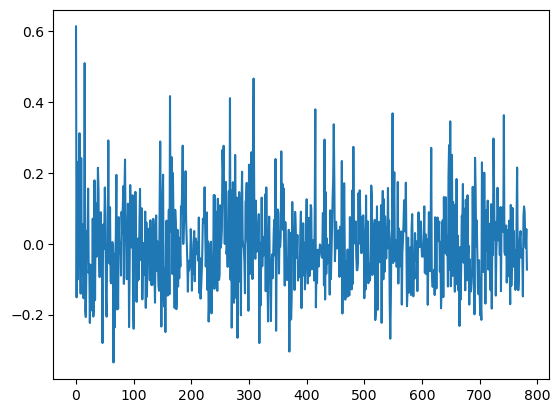

In [320]:
plt.plot(corrs)

(0.001, 15)

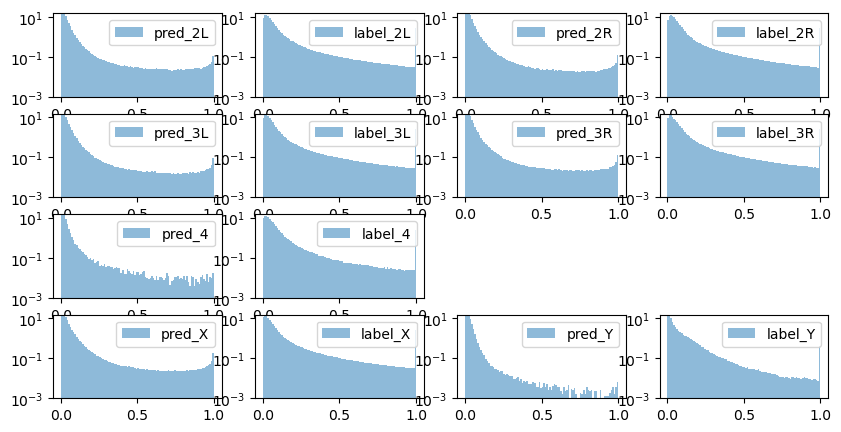

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()
plt.yscale("log")
plt.ylim(0.001,15)

plt.subplot(4,4,13)
plt.yscale("log")
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,15)
plt.yscale("log")
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()
plt.ylim(0.001,15)

In [109]:
tot = len(Y_2R)
part = len(Y_2R[Y_2R > 0.5])
part / tot

0.05329150989269716

In [144]:
# create scATAC values for each chr
Y_2L=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]
Y_2R=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['2R'][0]
Y_3L=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['3L'][0]
Y_3R=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['3R'][0]
Y_4=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['4'][0]
Y_X=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['X'][0]
Y_Y=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['Y'][0]

In [4]:
# create scATAC values for each chr
Y_KC=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]
Y_T1=np.load('/home/florian/projet/cell_types/scATACseq_T1.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]
Y_cortex=np.load('/home/florian/projet/cell_types/scATACseq_Cortexglia.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]


(170000.0, 180000.0)

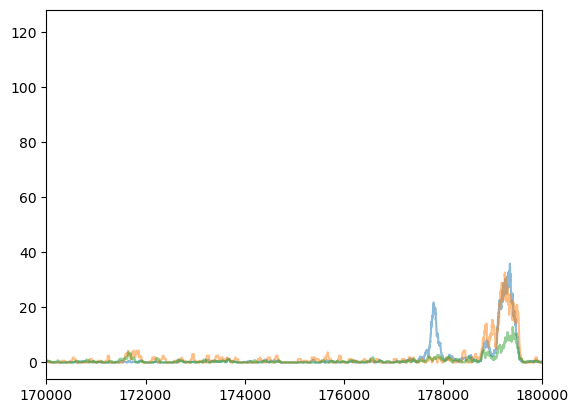

In [6]:
plt.plot(Y_KC,alpha=0.5)
plt.plot(Y_T1,alpha=0.5)
plt.plot(Y_cortex,alpha=0.5)
plt.xlim(170_000,180_000)

In [145]:
print("mean 2L:"+ str(np.mean(Y_2L)))
print('mean 2R:'+ str(np.mean(Y_2R)))
print('mean 3L:'+ str(np.mean(Y_3L)))
print('mean 3R:'+ str(np.mean(Y_3R)))
print('mean 4:'+ str(np.mean(Y_4)))
print('mean X:'+ str(np.mean(Y_X)))
print('mean Y:'+ str(np.mean(Y_Y)))

mean 2L:0.9975310895774041
mean 2R:0.9574466250941243
mean 3L:0.9165913723129601
mean 3R:0.981410788890169
mean 4:1.0147203283529886
mean X:0.8938466782119617
mean Y:0.1772921131276792


/home/dell3/anaconda3/envs/workenv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/dell3/anaconda3/envs/workenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


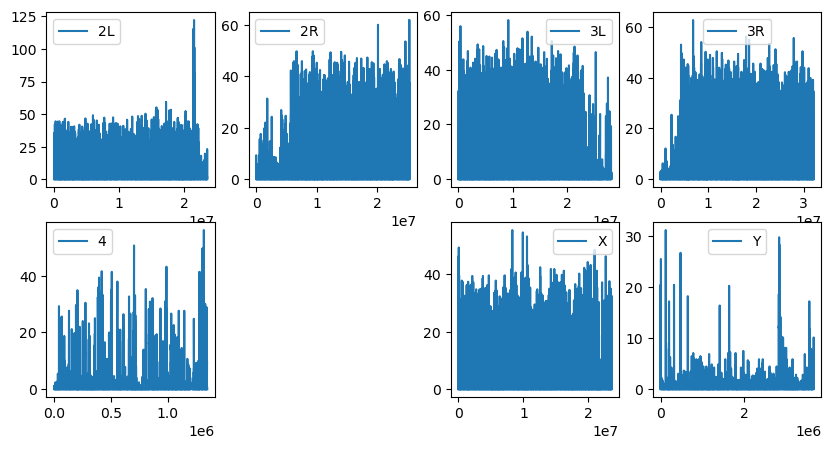

In [146]:
plt.figure(figsize=(10,5))

plt.subplot(2,4,1)
plt.plot(Y_2L,label='2L')
plt.legend()

plt.subplot(2,4,2)
plt.plot(Y_2R,label='2R')
plt.legend()

plt.subplot(2,4,3)
plt.plot(Y_3L,label='3L')
plt.legend()

plt.subplot(2,4,4)
plt.plot(Y_3R,label='3R')
plt.legend()

plt.subplot(2,4,5)
plt.plot(Y_4,label='4')
plt.legend()

plt.subplot(2,4,7)
plt.plot(Y_X,label='X')
plt.legend()

plt.subplot(2,4,8)
plt.plot(Y_Y,label='Y')
plt.legend()

In [ ]:
os.chdir('/home/florian/projet/results')
for file in [ 'T5.dedup.no_blacklist.RPGCnormalized',
 'T4.dedup.no_blacklist.RPGCnormalized',
 'T2a.dedup.no_blacklist.RPGCnormalized',
 'Cortexglia.dedup.no_blacklist.RPGCnormalized',
 'Astrocyte_like.dedup.no_blacklist.RPGCnormalized',
 'Perineurialglia.dedup.no_blacklist.RPGCnormalized',
 'Subperineurialglia.dedup.no_blacklist.RPGCnormalized']:
   cut=40
   Y_2L=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['2L'][0]
   Y_2L[Y_2L >= cut] = cut
   Y_2L=Y_2L/cut

   Y_2R=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['2R'][0]
   Y_2R[Y_2R >= cut] = cut
   Y_2R=Y_2R/cut

   Y_3L=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['3L'][0]
   Y_3L[Y_3L >= cut] = cut
   Y_3L=Y_3L/cut

   Y_3R=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['3R'][0]
   Y_3R[Y_3R >= cut] = cut
   Y_3R=Y_3R/cut

   Y_4=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['4'][0]
   Y_4[Y_4 >= cut] = cut
   Y_4=Y_4/cut

   Y_X=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['X'][0]
   Y_X[Y_X >= cut] = cut
   Y_X=Y_X/cut

   Y_Y=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['Y'][0]
   Y_Y[Y_Y >= 10] = 10
   Y_Y=Y_Y/10
   df = pd.read_csv ('/home/florian/projet/models/test_mae_scATACseq_{}.bw.npz/history.csv'.format(file))
   pred2L=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred2L']
   pred2R=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred2R']
   pred3L=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred3L']
   pred3R=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred3R']
   pred4=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred4']
   predX=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['predX']
   predY=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['predY']
   corr2L=round(np.corrcoef(Y_2L[::10],pred2L)[0][1],3)
   corr2R=round(np.corrcoef(Y_2R[::10],pred2R)[0][1],3)
   corr3R=round(np.corrcoef(Y_3R[1::10],pred3R)[0][1],3)
   corr3L=round(np.corrcoef(Y_3L[::10],pred3L)[0][1],3)
   corr4=round(np.corrcoef(Y_4[1::10],pred4)[0][1],3)
   corrX=round(np.corrcoef(Y_X[1::10],predX)[0][1],3)
   corrY=round(np.corrcoef(Y_Y[::10],predY)[0][1],3)
   mae2L=mae(Y_2L[::10],pred2L)
   mae2R=mae(Y_2R[::10],pred2R)
   mae3L=mae(Y_3L[::10],pred3L)
   mae3R=mae(Y_3R[1::10],pred3R)
   mae4=mae(Y_4[1::10],pred4)
   maeX=mae(Y_X[1::10],predX)
   maeY=mae(Y_Y[::10],predY)


   plt.figure(figsize=(15,10))

   plt.subplot(4,3,1)
   plt.hist2d(pred2L,Y_2L[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 2L ='+str(corr2L)+' mae 2L ='+str(mae2L))

   plt.subplot(4,3,2)
   plt.hist2d(pred2R,Y_2R[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 2R ='+str(corr2R)+' mae 2R ='+str(mae2R))

   plt.subplot(4,3,4)
   plt.hist2d(pred3L,Y_3L[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 3L ='+str(corr3L)+' mae 3L ='+str(mae3L))

   plt.subplot(4,3,5)
   plt.hist2d(pred3R,Y_3R[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 3R ='+str(corr3R)+' mae 3R ='+str(mae3R))

   plt.subplot(4,3,7)
   plt.hist2d(pred4,Y_4[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 4 ='+str(corr4)+' mae 4 ='+str(mae4))

   plt.subplot(4,3,10)
   plt.hist2d(predX,Y_X[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr X ='+str(corrX)+' mae X ='+str(maeX))

   plt.subplot(4,3,11)
   plt.hist2d(predY,Y_Y[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr Y ='+str(corrY)+' mae Y ='+str(maeY))

   plt.subplot(2,3,3)
   plt.plot(df['loss'],label='loss')
   plt.plot(df['val_loss'],label="val_loss")
   plt.legend()
   plt.title('loss values')

   plt.subplot(4,3,8)
   plt.plot(pred2L,label='pred')
   plt.plot(Y_2L[::10],label='label')
   plt.xlim(24_000,26_000)
   plt.legend()
   plt.title('signal vs pred 2L')

   plt.subplot(2,3,6)
   plt.axis([0, 10, 0, 10])
   plt.text(0,9,"list of parameters:")
   plt.text(0,8,"loss: mae+cor, optimizer: adam")
   plt.text(0,7,"generator info: new weights each batch with batches of size 1024")
   plt.text(0,6,"training data: random 2**20 per epoch on X, 3L and 4")
   plt.text(0,5,"validation data: 2**14 on 3R")
   plt.text(0,4,"early stopping patience: 5, over 20 epochs")
   plt.text(0,3,"data on 14 cell types")
   plt.text(0,2,"signal cut at 100")
   plt.text(0,1,"{}".format(file))
   plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19 w/ windows of size 2001")

   plt.axis("off")

   plt.subplots_adjust(bottom=0.001, top=0.9999)

   plt.savefig('{}_mae.png'.format(file), bbox_inches='tight')

In [58]:
# create scATAC values for each chr
cut=40
Y_2L=np.load('/home/florian/projet/cell_types/scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]
Y_2L[Y_2L >= cut] = cut
Y_2L=Y_2L/cut

Y_2R=np.load('/home/florian/projet/cell_types/scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['2R'][0]
Y_2R[Y_2R >= cut] = cut
Y_2R=Y_2R/cut

Y_3L=np.load('/home/florian/projet/cell_types/scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['3L'][0]
Y_3L[Y_3L >= cut] = cut
Y_3L=Y_3L/cut

Y_3R=np.load('/home/florian/projet/cell_types/scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['3R'][0]
Y_3R[Y_3R >= cut] = cut
Y_3R=Y_3R/cut

Y_4=np.load('/home/florian/projet/cell_types/scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['4'][0]
Y_4[Y_4 >= cut] = cut
Y_4=Y_4/cut

Y_X=np.load('/home/florian/projet/cell_types/scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['X'][0]
Y_X[Y_X >= cut] = cut
Y_X=Y_X/cut

Y_Y=np.load('/home/florian/projet/cell_types/scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['Y'][0]
Y_Y[Y_Y >= 10] = 10
Y_Y=Y_Y/10

df = pd.read_csv ('/home/florian/projet/models/test_mae_scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz/history.csv')
pred2L=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_T5.dedup.no_blacklist.RPGCnormalized.bw.npz')['predY']
corr2L=round(np.corrcoef(Y_2L[::10],pred2L)[0][1],3)
corr2R=round(np.corrcoef(Y_2R[::10],pred2R)[0][1],3)
corr3R=round(np.corrcoef(Y_3R[1::10],pred3R)[0][1],3)
corr3L=round(np.corrcoef(Y_3L[::10],pred3L)[0][1],3)
corr4=round(np.corrcoef(Y_4[1::10],pred4)[0][1],3)
corrX=round(np.corrcoef(Y_X[1::10],predX)[0][1],3)
corrY=round(np.corrcoef(Y_Y[::10],predY)[0][1],3)
mae2L=mae(Y_2L[::10],pred2L)
mae2R=mae(Y_2R[::10],pred2R)
mae3L=mae(Y_3L[::10],pred3L)
mae3R=mae(Y_3R[1::10],pred3R)
mae4=mae(Y_4[1::10],pred4)
maeX=mae(Y_X[1::10],predX)
maeY=mae(Y_Y[::10],predY)

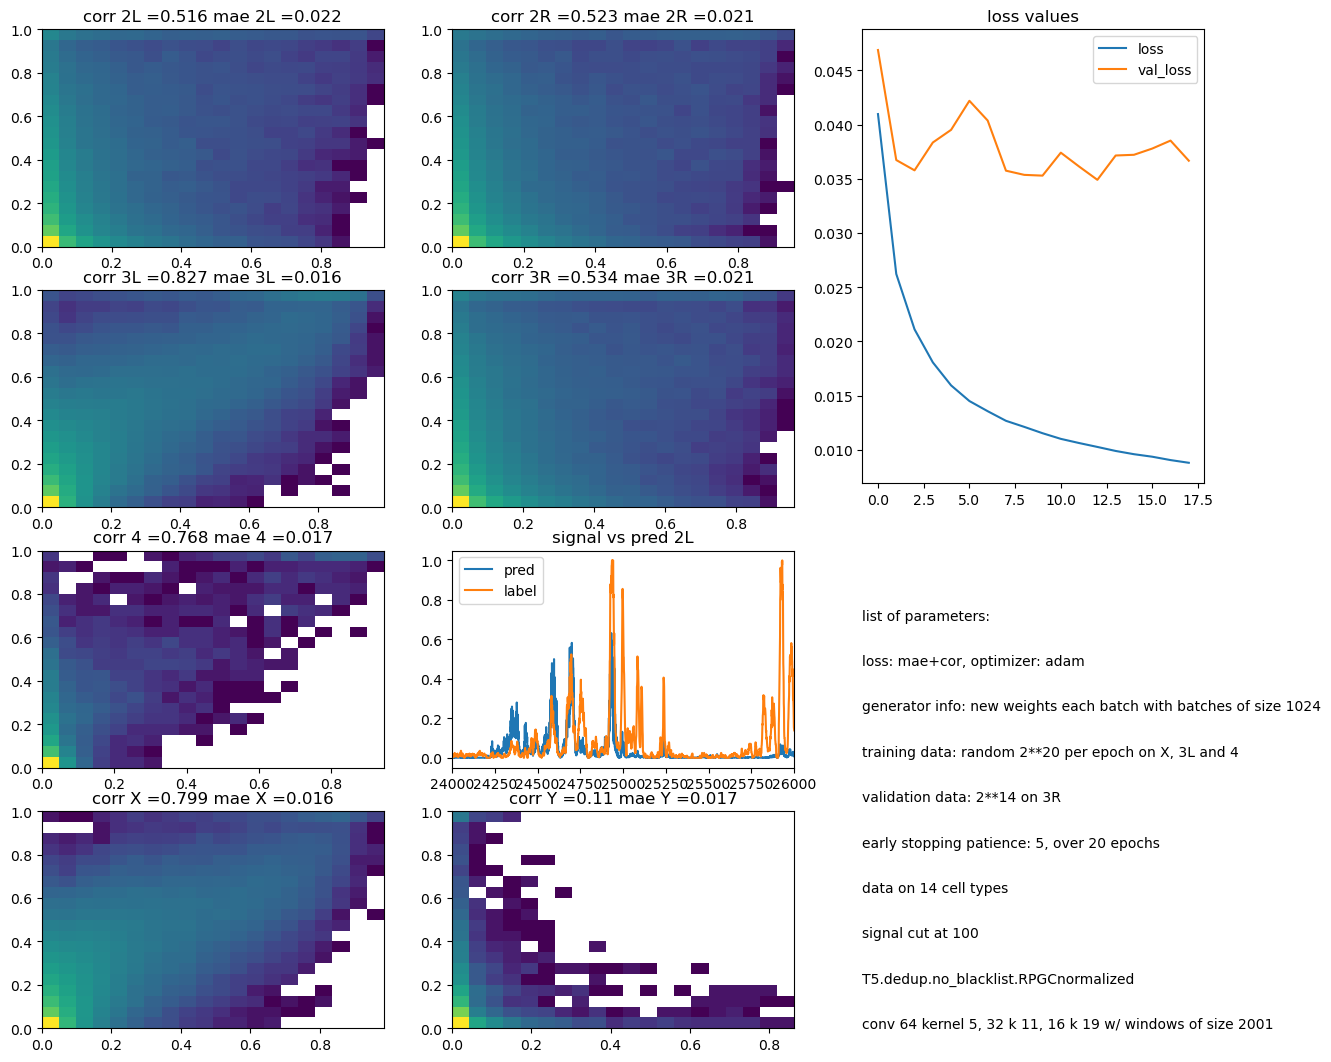

In [61]:
plt.figure(figsize=(15,10))

plt.subplot(4,3,1)
plt.hist2d(pred2L,Y_2L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2L ='+str(corr2L)+' mae 2L ='+str(mae2L))

plt.subplot(4,3,2)
plt.hist2d(pred2R,Y_2R[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2R ='+str(corr2R)+' mae 2R ='+str(mae2R))

plt.subplot(4,3,4)
plt.hist2d(pred3L,Y_3L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3L ='+str(corr3L)+' mae 3L ='+str(mae3L))

plt.subplot(4,3,5)
plt.hist2d(pred3R,Y_3R[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3R ='+str(corr3R)+' mae 3R ='+str(mae3R))

plt.subplot(4,3,7)
plt.hist2d(pred4,Y_4[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 4 ='+str(corr4)+' mae 4 ='+str(mae4))

plt.subplot(4,3,10)
plt.hist2d(predX,Y_X[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr X ='+str(corrX)+' mae X ='+str(maeX))

plt.subplot(4,3,11)
plt.hist2d(predY,Y_Y[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr Y ='+str(corrY)+' mae Y ='+str(maeY))

plt.subplot(2,3,3)
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

plt.subplot(4,3,8)
plt.plot(pred2L,label='pred')
plt.plot(Y_2L[::10],label='label')
plt.xlim(24000,26000)
plt.legend()
plt.title('signal vs pred 2L')

plt.subplot(2,3,6)
plt.axis([0, 10, 0, 10])
plt.text(0,9,"list of parameters:")
plt.text(0,8,"loss: mae+cor, optimizer: adam")
plt.text(0,7,"generator info: new weights each batch with batches of size 1024")
plt.text(0,6,"training data: random 2**20 per epoch on X, 3L and 4")
plt.text(0,5,"validation data: 2**14 on 3R")
plt.text(0,4,"early stopping patience: 5, over 20 epochs")
plt.text(0,3,"data on 14 cell types")
plt.text(0,2,"signal cut at 100")
plt.text(0,1,"T5.dedup.no_blacklist.RPGCnormalized")
plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19 w/ windows of size 2001")

plt.axis("off")

plt.subplots_adjust(bottom=0.001, top=0.9999)

In [99]:
cut=100
Y_3L=np.load('/home/florian/projet/scATACseq_14chr.npz')['3L'][0]
Y_3L[Y_3L >= cut] = cut
Y_3L=Y_3L/cut
Y_X=np.load('/home/florian/projet/scATACseq_14chr.npz')['X'][0]
Y_X[Y_X >= cut] = cut
Y_X=Y_X/cut


Text(0.5, 1.0, '10899-10959 kb on 3L')

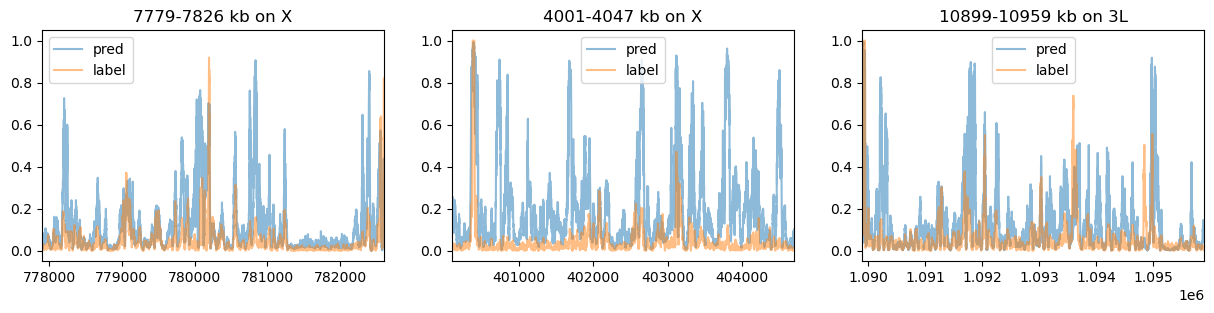

In [124]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(predX,alpha=0.5,label="pred")
plt.plot(Y_X[::10],alpha=0.5,label="label")
plt.xlim(7779*100,7826*100)
plt.legend()
plt.title('7779-7826 kb on X')

plt.subplot(1,3,2)
plt.plot(predX,alpha=0.5,label="pred")
plt.plot(Y_X[::10],alpha=0.5,label="label")
plt.xlim(4001*100,4047*100)
plt.legend()
plt.title('4001-4047 kb on X')

plt.subplot(1,3,3)
plt.plot(pred3L,alpha=0.5,label="pred")
plt.plot(Y_3L[::10],alpha=0.5,label="label")
plt.xlim(10899*100,10959*100)
plt.legend()
plt.title('10899-10959 kb on 3L')

In [104]:
2**20


1048576

In [105]:
len(Y_3L)

28110227

In [106]:
2**14

16384